# Import

In [ ]:
import numpy as np
import pandas as pd
import xarray as xr
import glob
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader

region_str = 'northwest_peru'
model_list = ['ACCESS-ESM1-5', 'CanESM5', 'CNRM-CM6-1', 'IPSL-CM6A-LR', 'MIROC6', 'MIROC-ES2L', 'NorCPM1']
model_skip_list = []

variant_list = {}
variant_list['ACCESS-ESM1-5'] = ['r10i1p1f1', 'r11i1p1f1', 'r12i1p1f1', 'r13i1p1f1', 'r14i1p1f1', 'r15i1p1f1', 'r16i1p1f1', 'r19i1p1f1', 'r20i1p1f1', 'r21i1p1f1', 'r22i1p1f1', 'r23i1p1f1', 'r24i1p1f1', 'r25i1p1f1', 'r27i1p1f1', 'r30i1p1f1', 'r31i1p1f1', 'r33i1p1f1', 'r34i1p1f1', 'r35i1p1f1', 'r36i1p1f1', 'r37i1p1f1', 'r38i1p1f1', 'r3i1p1f1', 'r40i1p1f1', 'r4i1p1f1', 'r6i1p1f1', 'r7i1p1f1', 'r8i1p1f1']
variant_list['CanESM5'] = ['r10i1p1f1', 'r10i1p2f1', 'r11i1p2f1', 'r12i1p2f1', 'r13i1p2f1', 'r14i1p1f1', 'r14i1p2f1', 'r16i1p1f1', 'r19i1p1f1', 'r19i1p2f1', 'r1i1p2f1', 'r20i1p2f1', 'r22i1p1f1', 'r24i1p2f1', 'r25i1p2f1', 'r26i1p2f1', 'r29i1p2f1', 'r30i1p2f1', 'r32i1p2f1', 'r33i1p2f1', 'r35i1p2f1', 'r36i1p2f1', 'r3i1p2f1', 'r4i1p1f1', 'r4i1p2f1', 'r6i1p1f1', 'r7i1p2f1', 'r8i1p1f1', 'r9i1p2f1']
variant_list['CNRM-CM6-1'] = ['r10i1p1f2', 'r11i1p1f2', 'r12i1p1f2', 'r13i1p1f2', 'r14i1p1f2', 'r15i1p1f2', 'r16i1p1f2', 'r17i1p1f2', 'r18i1p1f2', 'r19i1p1f2', 'r1i1p1f2', 'r20i1p1f2', 'r21i1p1f2', 'r22i1p1f2', 'r24i1p1f2', 'r25i1p1f2', 'r26i1p1f2', 'r27i1p1f2', 'r28i1p1f2', 'r29i1p1f2', 'r2i1p1f2', 'r30i1p1f2', 'r3i1p1f2', 'r4i1p1f2', 'r5i1p1f2', 'r6i1p1f2', 'r7i1p1f2', 'r8i1p1f2', 'r9i1p1f2']
variant_list['IPSL-CM6A-LR'] = ['r10i1p1f1', 'r11i1p1f1', 'r12i1p1f1', 'r13i1p1f1', 'r14i1p1f1', 'r15i1p1f1', 'r16i1p1f1', 'r17i1p1f1', 'r19i1p1f1', 'r1i1p1f1', 'r20i1p1f1', 'r21i1p1f1', 'r22i1p1f1', 'r23i1p1f1', 'r24i1p1f1', 'r25i1p1f1', 'r27i1p1f1', 'r28i1p1f1', 'r29i1p1f1', 'r30i1p1f1', 'r31i1p1f1', 'r32i1p1f1', 'r33i1p1f1', 'r3i1p1f1', 'r4i1p1f1', 'r6i1p1f1', 'r7i1p1f1', 'r8i1p1f1', 'r9i1p1f1']
variant_list['MIROC6'] = ['r10i1p1f1', 'r11i1p1f1', 'r13i1p1f1', 'r14i1p1f1', 'r15i1p1f1', 'r16i1p1f1', 'r19i1p1f1', 'r20i1p1f1', 'r21i1p1f1', 'r22i1p1f1', 'r23i1p1f1', 'r24i1p1f1', 'r25i1p1f1', 'r30i1p1f1', 'r33i1p1f1', 'r34i1p1f1', 'r35i1p1f1', 'r36i1p1f1', 'r37i1p1f1', 'r38i1p1f1', 'r40i1p1f1', 'r42i1p1f1', 'r46i1p1f1', 'r49i1p1f1', 'r4i1p1f1', 'r50i1p1f1', 'r6i1p1f1', 'r7i1p1f1', 'r8i1p1f1']
variant_list['MIROC-ES2L'] = ['r10i1p1f2', 'r12i1p1f2', 'r13i1p1f2', 'r14i1p1f2', 'r15i1p1f2', 'r16i1p1f2', 'r17i1p1f2', 'r18i1p1f2', 'r19i1p1f2', 'r1i1000p1f2', 'r1i1p1f2', 'r20i1p1f2', 'r21i1p1f2', 'r22i1p1f2', 'r23i1p1f2', 'r24i1p1f2', 'r25i1p1f2', 'r26i1p1f2', 'r27i1p1f2', 'r29i1p1f2', 'r2i1p1f2', 'r30i1p1f2', 'r3i1p1f2', 'r4i1p1f2', 'r5i1p1f2', 'r6i1p1f2', 'r7i1p1f2', 'r8i1p1f2', 'r9i1p1f2']
variant_list['NorCPM1'] = ['r10i1p1f1', 'r11i1p1f1', 'r12i1p1f1', 'r13i1p1f1', 'r14i1p1f1', 'r15i1p1f1', 'r16i1p1f1', 'r17i1p1f1', 'r18i1p1f1', 'r19i1p1f1', 'r1i1p1f1', 'r20i1p1f1', 'r21i1p1f1', 'r22i1p1f1', 'r23i1p1f1', 'r24i1p1f1', 'r25i1p1f1', 'r26i1p1f1', 'r27i1p1f1', 'r28i1p1f1', 'r29i1p1f1', 'r2i1p1f1', 'r30i1p1f1', 'r3i1p1f1', 'r4i1p1f1', 'r6i1p1f1', 'r7i1p1f1', 'r8i1p1f1', 'r9i1p1f1']

region_lat = slice(-9, -3)
region_lon = slice(360-82, 360-76)

print(region_str)

northwest_peru


# Load GCM data

In [ ]:
pr = {}
for kk, model in enumerate(model_list):
    print('loading data from', model, '...')
    if kk not in model_skip_list:
        pr[model] = {}
        for ll, var in enumerate(variant_list[model]):
            time_bnds = slice('1850-01-01', '2015-01-01')
            pr_files = sorted(glob.glob('1_climate_input_data/CMIP6/pr_Amon_'+model+'_historical_'+var+'*.nc'))

            ## check for entire 1850-2014 file in list ##
            if (len(pr_files) > 0):
                pr_f_idx = np.argwhere(['185001-201412' in pr_files[i] for i in range(len(pr_files))])
                if sum(pr_f_idx) > 0:
                    pr_files = np.array(pr_files)[pr_f_idx[0]]

            pr[model][var] = xr.open_mfdataset(pr_files).pr.sel(lat=region_lat, lon=region_lon)*86400 # kg m-2 s-1 --> mm / day
            weights = np.cos(np.deg2rad(pr[model][var].lat))
            weights.name = "weights"
            pr[model][var] = pr[model][var].weighted(weights).mean(dim=['lat', 'lon']).sel(time=time_bnds)
            march_idx = pr[model][var].time.dt.month == 3
            pr[model][var] = pr[model][var].isel(time=march_idx)

pr_vals = {}
for kk, model in enumerate(model_list):
    print('accessing', model, 'data ...')
    if kk not in model_skip_list:
        pr_vals[model] = {}
        for ll, var in enumerate(variant_list[model]):
            pr_vals[model][var] = pr[model][var].values

loading data from ACCESS-ESM1-5 ...
loading data from CanESM5 ...
loading data from CNRM-CM6-1 ...
loading data from IPSL-CM6A-LR ...
loading data from MIROC6 ...
loading data from MIROC-ES2L ...
loading data from NorCPM1 ...
accessing ACCESS-ESM1-5 data ...
accessing CanESM5 data ...
accessing CNRM-CM6-1 data ...
accessing IPSL-CM6A-LR data ...
accessing MIROC6 data ...
accessing MIROC-ES2L data ...
accessing NorCPM1 data ...


# Has anthropogenic forcing increased the frequency of extreme March precipitation (above 90th percentile)?

In [ ]:
## calculate 90th percentile threshold from the period 1985-2014 ##
qPR = 90
pr_90 = {}
for jj, model in enumerate(model_list):
    if jj not in model_skip_list:
        pr_90[model] = {}
        for var in variant_list[model]:
            last_30_yrs_idx = (pr[model][var].time.dt.year >= 1985) & (pr[model][var].time.dt.year <= 2014)
            pr_90[model][var] = np.percentile(pr_vals[model][var][last_30_yrs_idx], q=qPR)

model = model_list[0]
var = variant_list[model_list[0]][0]
wet_idx = np.ones([len(pr.keys())*len(variant_list[model]), len(pr_vals[model][var])]).astype(int)
ct = -1
for jj, model in enumerate(model_list):
    if jj not in model_skip_list:
        for var in variant_list[model]:
            ct = ct+1
            wet_idx[ct,:] = (pr_vals[model][var] >= pr_90[model][var]).astype(int)

early mean = 7.47783251231527
mid mean = 9.041303524062144
late mean = 9.901477832512315
Early-Mid P-value = 0.00712209719845136
Early-Late P-value = 9.909301386655972e-05
Mid-Late P-value = 0.2363002233927719


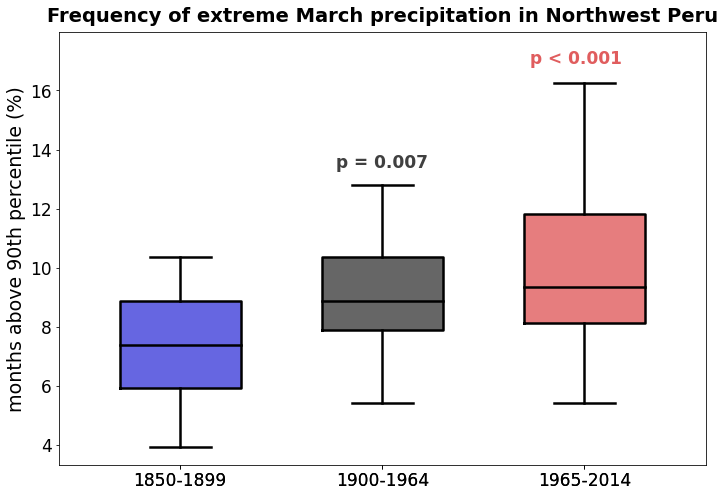

In [ ]:
## count the number of realizations with extreme March precipitation each year (above the 90th percentile) ##
fs = 16
model = model_list[0]
var = variant_list[model_list[0]][0]

fig, ax = plt.subplots(1,1,figsize=(10,7))
fraction = 100*np.mean(wet_idx, axis=0)

## Define timespan for early, mid, and late periods ##
early_idx = pr[model][var].time.dt.year < 1900
mid_idx = (pr[model][var].time.dt.year >= 1900) & (pr[model][var].time.dt.year < 1965)
late_idx = pr[model][var].time.dt.year >= 1965

title_list = ['P'+str(qPR)]
alph=0.6
lw=2.5

## Plot box faces ##
ax.boxplot(fraction[early_idx], positions=[0],
           labels=['1850-1899'],patch_artist=True,
           medianprops={"color":'black', "alpha":1, "lw":lw},
           capprops={"color":'black', "alpha":1, "lw":lw},
           whiskerprops={"color":'black', "alpha":1, "lw":lw},
           boxprops={"facecolor":'mediumblue', "alpha":alph})
ax.boxplot(fraction[mid_idx], positions=[0.25],
           labels=['1900-1964'],patch_artist=True,
           medianprops={"color":'black', "alpha":1, "lw":lw},
           capprops={"color":'black', "alpha":1, "lw":lw},
           whiskerprops={"color":'black', "alpha":1, "lw":lw},
           boxprops={"facecolor":'black', "alpha":alph})
ax.boxplot(fraction[late_idx], positions=[0.5],
           labels=['1965-2014'],patch_artist=True,
           medianprops={"color":'black', "alpha":1, "lw":lw},
           capprops={"color":'black', "alpha":1, "lw":lw},
           whiskerprops={"color":'black', "alpha":1, "lw":lw},
           boxprops={"facecolor":'tab:red', "alpha":alph})

## Plot box borders ##
ax.boxplot(fraction[early_idx], positions=[0],
           labels=['1850-1899'],patch_artist=False,
           medianprops={"color":'black', "alpha":0, "lw":lw},
           boxprops={"color":'black', "alpha":1, "lw":lw})
ax.boxplot(fraction[mid_idx], positions=[0.25],
           labels=['1900-1964'],patch_artist=False,
           medianprops={"color":'black', "alpha":0, "lw":lw},
           boxprops={"color":'black', "alpha":1, "lw":lw})
ax.boxplot(fraction[late_idx], positions=[0.5],
           labels=['1965-2014'],patch_artist=False,
           medianprops={"color":'black', "alpha":0, "lw":lw},
           boxprops={"color":'black', "alpha":1, "lw":lw})

ax.set_xlim(-0.15,0.65)
ax.set_ylim(top=ax.get_ylim()[1]+1.1)
ax.tick_params(axis='both', labelsize=fs+1)
ax.set_ylabel('months above 90th percentile (%)', fontsize=fs+3)

print('early mean =',np.mean(fraction[early_idx]))
print('mid mean =',np.mean(fraction[mid_idx]))
print('late mean =',np.mean(fraction[late_idx]))

## Perform K-S Test ##
pval = ks_2samp(fraction[early_idx], fraction[mid_idx]).pvalue
print('Early-Mid P-value =', pval)
if pval < 0.001:
    ax.annotate('p < 0.001', xy=(0.57,0.72), color='black', alpha=alph+0.15,
                xycoords='axes fraction', ha='right', va='top', fontsize=fs+1, fontweight='bold')
else:
    ax.annotate('p = '+'{:.3f}'.format(np.round(pval,5))+'', xy=(0.57,0.72), color='black',alpha=alph+0.15,
                xycoords='axes fraction', ha='right', va='top', fontsize=fs+1, fontweight='bold')

pval = ks_2samp(fraction[early_idx], fraction[late_idx]).pvalue
print('Early-Late P-value =', pval)
if pval < 0.001:
    ax.annotate('p < 0.001', xy=(0.87,0.96), color='tab:red',alpha=alph+0.15,
                xycoords='axes fraction', ha='right', va='top', fontsize=fs+1, fontweight='bold')
else:
    ax.annotate('p = '+'{:.3f}'.format(np.round(pval,5))+'', xy=(0.87,0.96), color='red',alpha=alph+0.15,
                xycoords='axes fraction', ha='right', va='top', fontsize=fs+1, fontweight='bold')

pval = ks_2samp(fraction[mid_idx], fraction[late_idx]).pvalue
print('Mid-Late P-value =',pval)

ax.set_title('Frequency of extreme March precipitation in Northwest Peru',
             fontsize=fs+3.5, fontweight='bold', y=1.01)
plt.tight_layout()

## Save Figure ##
plt.savefig('1_climate_figures/extreme_March_precip.jpg', dpi=500, bbox_inches='tight', pad_inches=0.2)
plt.savefig('1_climate_figures/extreme_March_precip.pdf', dpi=500, bbox_inches='tight', pad_inches=0.2)

In [ ]:
print("Change in 1965-2014 mean relative to 1850-1899 =",100*(9.901477832512315 - 7.47783251231527)/ 7.47783251231527, '%')
print("Change in 1900-1964 mean relative to 1850-1899 =",100*(9.041303524062144 - 7.47783251231527)/ 7.47783251231527, '%')

Change in 1965-2014 mean relative to 1850-1899 = 32.41106719367591 %
Change in 1900-1964 mean relative to 1850-1899 = 20.908077429816572 %


# Plot Region Map for Northwest Peru

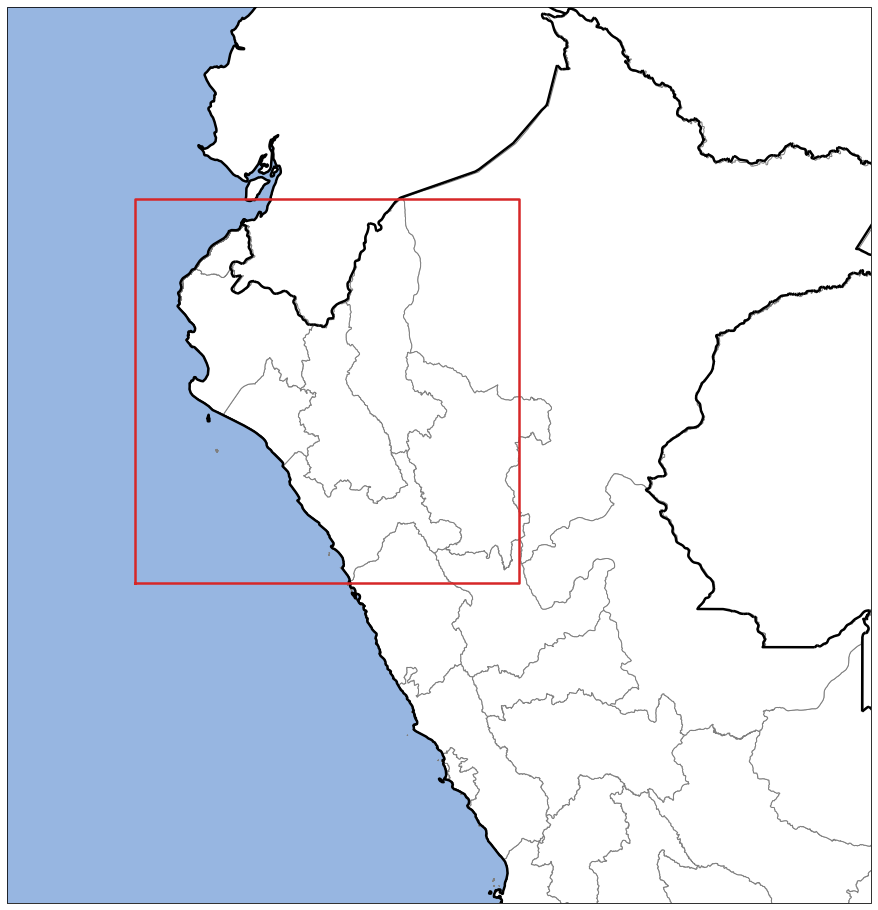

In [ ]:
fs = 20

fig = plt.figure(figsize=(15,16))
ax1 = fig.add_axes([0.05, 0.05, 0.80, 0.80], projection=ccrs.PlateCarree())

ax1.add_feature(cfeature.OCEAN, ec='k')
ax1.add_feature(cfeature.LAKES, ec='tab:blue', lw=0.5)

ocean_50m = cfeature.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land', '10m',
                                        edgecolor='k',
                                        facecolor='white')
ax1.add_feature(ocean_50m)
ax1.add_geometries(Reader('../1_climate_input_data/shapefiles/PER_adm1.shp').geometries(),
              ccrs.PlateCarree(),
              facecolor='white', ec='tab:gray')

ax1.add_feature(cfeature.BORDERS, ec='k', lw=2.5)
ax1.add_feature(cfeature.COASTLINE, ec='k', lw=2.5)
ax1.set_extent([-84,-70.5,-14,0])

ax1.plot([-82, -76, -76, -82, -82], [-9, -9, -3, -3, -9],
         color='tab:red', linewidth=2.5, marker='')

plt.savefig('1_climate_figures/'+region_str+'_map.jpg', dpi=500, bbox_inches='tight', pad_inches=0.2)